In [ ]:
import numpy as np
from matplotlib import pyplot as plt

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
Uppgift 1


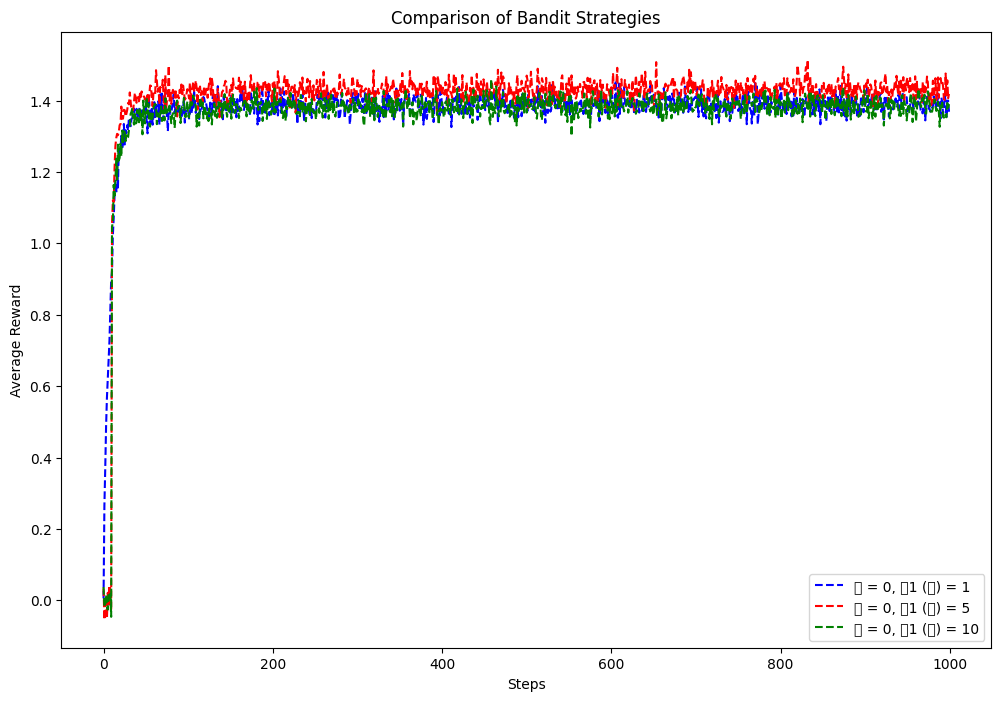

In [ ]:
class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon, mode, Q, C): #<----
        self.Q = [Q for i in range(numArms)]
        self.N = [0 for i in range(numArms)]
        self.C = C
        self.numArms = numArms
        self.epsilon = epsilon
        self.trueRewards = trueRewards
        self.lastAction = None
        self.steps = 0
        self.mode = mode

    def pull(self):
        rand = np.random.random()
        if self.C == 0: # vanilla epsilon-greedy
            if rand <= self.epsilon:
                whichArm = np.random.choice(self.numArms)
            elif rand > self.epsilon:
                a = np.array([approx for approx in self.Q])
                whichArm = np.random.choice(np.where(a == a.max())[0])

        elif self.C > 0: # UCB
            a = np.zeros(self.numArms)
            for idx, approx in enumerate(self.Q):
                if self.N[idx] != 0:
                    a[idx] = approx + self.C * np.sqrt(np.log(self.steps)/self.N[idx])
                elif self.N[idx] == 0:
                    whichArm = idx
                    break
            else:
                whichArm = np.random.choice(np.where(a == a.max())[0])

        self.lastAction = whichArm
        self.steps += 1
        return np.random.randn() + self.trueRewards[whichArm]

    def updateMean(self,sample):
        whichArm = self.lastAction
        self.N[whichArm] += 1

        if self.mode == 'sample-average':
            self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm] * (sample - self.Q[whichArm])
        elif self.mode == 'constant':
            self.Q[whichArm] = self.Q[whichArm] + 0.1 * (sample - self.Q[whichArm])  # 0.1 is alpha


def simulate(numArms, epsilon, numPulls, mode, Q, C):
    rewardHistory = np.zeros(numPulls)
    for j in range(2000):
        rewards = [np.random.randn() for _ in range(numActions)]
        bandit = Bandit(numArms, rewards, epsilon, mode, Q, C)
        if j % 200 == 0:
            print(j)
        for i in range(numPulls):
            reward = bandit.pull()
            bandit.updateMean(reward)
            rewardHistory[i] += reward

    average = rewardHistory / 2000
    return average



numActions = 10

run1 = simulate(numActions, epsilon=0.0, numPulls=1000, mode='sample-average', Q = 1, C = 0)
run2 = simulate(numActions, epsilon=0.0, numPulls=1000, mode='sample-average', Q = 5, C = 0)
run3 = simulate(numActions, epsilon=0.0, numPulls=1000, mode='sample-average', Q = 10, C = 0)


plt.figure(figsize=(12, 8))
print("Uppgift 1")
plt.plot(run1, 'b--', label='𝜖 = 0, 𝑄1 (𝑎) = 1')
plt.plot(run2, 'r--', label='𝜖 = 0, 𝑄1 (𝑎) = 5')
plt.plot(run3, 'g--', label='𝜖 = 0, 𝑄1 (𝑎) = 10')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Bandit Strategies')
plt.show()

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
Uppgift 2


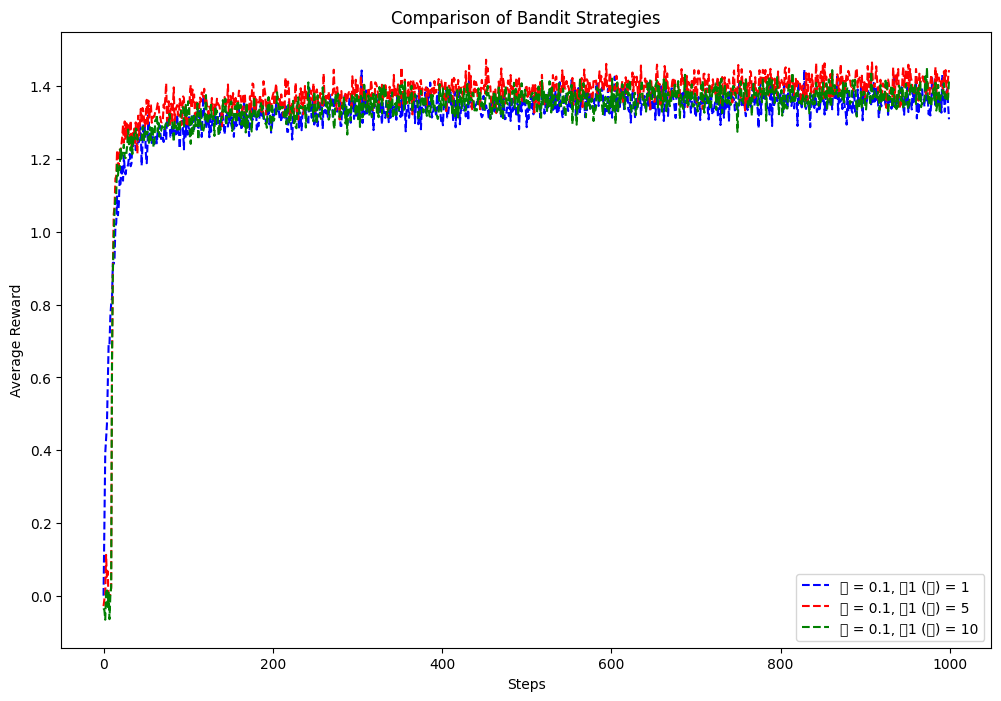

In [ ]:
numActions = 10

run4 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 1, C = 0)
run5 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 5, C = 0)
run6 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 10, C = 0)


plt.figure(figsize=(12, 8))
print("Uppgift 2")
plt.plot(run4, 'b--', label='𝜖 = 0.1, 𝑄1 (𝑎) = 1')
plt.plot(run5, 'r--', label='𝜖 = 0.1, 𝑄1 (𝑎) = 5')
plt.plot(run6, 'g--', label='𝜖 = 0.1, 𝑄1 (𝑎) = 10')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Bandit Strategies')
plt.show()

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


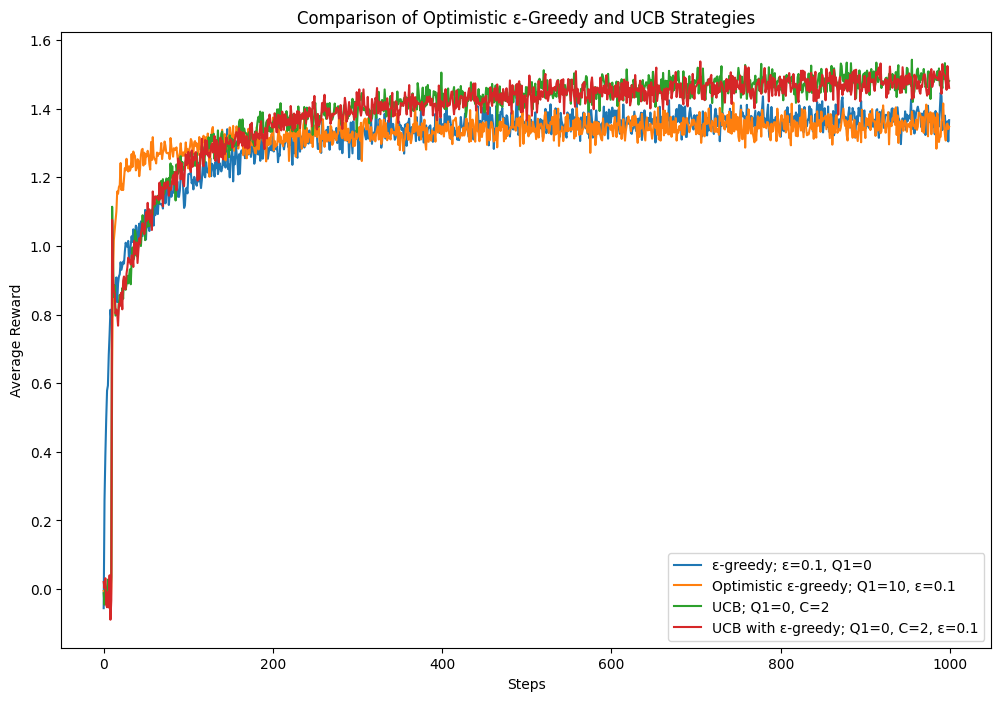

In [ ]:
# ε-greedy; ε = 0.1, Q1(a) = 0
run_epsilon_greedy_Q0 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q=0, C=0)

# Optimistic ε-greedy; Q1(a) = 10 and ε = 0.1
run_optimistic_epsilon_greedy_Q10 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q=10, C=0)

# UCB; Q1(a) = 0 and C = 2
run_ucb_Q0_C2 = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q=0, C=2)

# UCB with ε = 0.1; Q1(a) = 0 and C = 2
run_ucb_epsilon_greedy_Q0_C2 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q=0, C=2)

# Plotting the results for task 3
plt.figure(figsize=(12, 8))
plt.plot(run_epsilon_greedy_Q0, label='ε-greedy; ε=0.1, Q1=0')
plt.plot(run_optimistic_epsilon_greedy_Q10, label='Optimistic ε-greedy; Q1=10, ε=0.1')
plt.plot(run_ucb_Q0_C2, label='UCB; Q1=0, C=2')
plt.plot(run_ucb_epsilon_greedy_Q0_C2, label='UCB with ε-greedy; Q1=0, C=2, ε=0.1')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Optimistic ε-Greedy and UCB Strategies')
plt.show()